This tutorial will show how to use and modify the data generator pack for Tacton.
Data objects that are relevant for this project are:
C_data - Combination data, 
D_data - Discount data, 
p_data - probability data, 
deal_data - Quote outcome. 
For more information regarding the algorithms behind the data generator: 
https://docs.google.com/document/d/10QUrTwTu61wxq57S-zQgsrRc2BtC6QuKa8mXj4Q4f84/edit

In [2]:
import numpy as np
from matplotlib import pylab as plt
from generate_cpq_data_class import *


The Generator_pack creates a C-gen (Combinations/dimensions-generator), D_gen (Discount-generator), a P (Probability function) and a corresponding P_gen (Probability-generator).

We start this tutortial by initiate a Generator_pack G. discount_max, discount_min, discount_mean, discount_std are parameters for the distribution of the discount data (truncated normal distribution). mean_p and max_p are parameters for the probability distribution. 

In [3]:
G=Generator_pack(discount_max = 0.4, discount_min=0, discount_mean = 0.15, discount_std = 0.2, mean_p = 0.2,
                  max_p = 0.4)



To generate C-data and D-data from the Generator_pack G we just call G.C_gen(nr=50000) and G.D_gen(nr=50000), where nr is the number of data points you want to sample. 

In [4]:
C_data = G.C_gen(nr=50000)
D_data = G.D_gen(nr=50000)



When we have C_data and D_data we can use G.P_gen to produce p_data (probability data), deal_data (Quote outcome: win=1, loss=0), y_data (meta data describing the probability function of p given C, y[:,0] = k and y[:,1] = m).  

In [5]:
y_data, p_data, deal_data =G.P_gen(C_data,D_data)

Plotting the distribution of the generated data

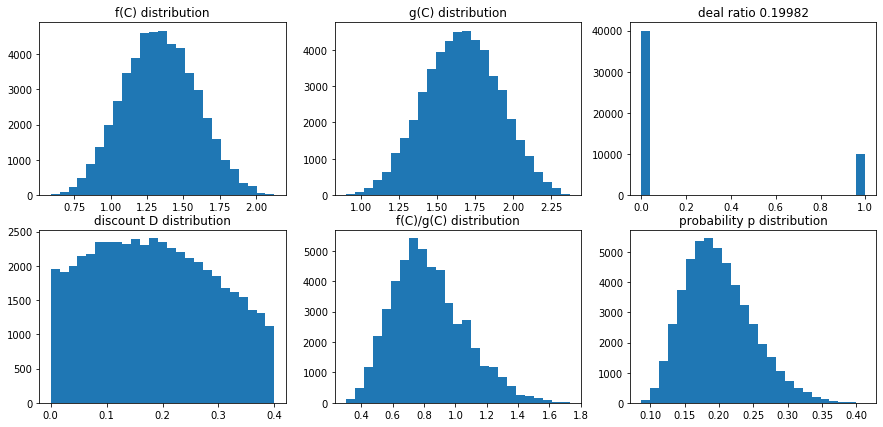

In [6]:
u, frac = np.unique(deal_data, return_counts=True)

# Ploting the distribution of the generated data
bins = 25
f, ax = plt.subplots(2,3,figsize=(15,7))
ax[0,0].hist(y_data[:,0],bins=bins)
ax[0,0].set_title("f(C) distribution")
ax[0,1].hist(y_data[:,1],bins=bins)
ax[0,1].set_title("g(C) distribution")
ax[1,0].hist(D_data,bins=bins)
ax[1,0].set_title("discount D distribution")
ax[1,1].hist(y_data[:, 0]/y_data[:, 1],bins=bins)
ax[1,1].set_title("f(C)/g(C) distribution")
ax[1,2].hist(p_data, bins=bins)
ax[1,2].set_title("probability p distribution")
ax[0, 2].hist(deal_data, bins=bins)
deal_ratio = np.round(frac[1]/(frac[0] + frac[1]),5)
ax[0, 2].set_title("deal ratio " + str(deal_ratio))
plt.show()
# plt.savefig('distributions_cpq_data')
plt.close()

#
p_stat = frac[1]/(frac[0] + frac[1])


If we want to modify the probability function for a specific set of C, e.g. C_1 = [2,1,0,3,6,3] we start to transform C_1 with one hot.

In [7]:
C_1 = [2,1,0,3,6,3]
C_1_oh = one_hot(C_1)
print(C_1_oh)
print("C_data shape: ", C_data.shape)

[0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1.]
C_data shape:  (50000, 30)


If we want the probability function for C_1 to have a specific shape p(C_1,D)=sigmoid(k_desired*D-m_desired), we can just rebuild the M and/or the b of G.P to fit the desired form. 
To call M and b we simple write G.P.M, G.P.b:


In [8]:
print("M: ", G.P.M)
print("b: ", G.P.b)

M:  [[ 0.39572906 -0.3796552 ]
 [ 0.19107105 -0.2411752 ]
 [ 0.28992879 -0.30799786]
 [ 0.26260076 -0.33429401]
 [ 0.28921356 -0.22034297]
 [ 0.0707652  -0.38153981]
 [ 0.33803885 -0.01257659]
 [ 0.1257382  -0.12969593]
 [ 0.41226161 -0.22024107]
 [ 0.36200023 -0.31286984]
 [ 0.39628314 -0.03586047]
 [ 0.2194697  -0.01418335]
 [ 0.18816419 -0.08608495]
 [ 0.39748928 -0.11540389]
 [ 0.00175803 -0.08224703]
 [ 0.09471664 -0.20767707]
 [ 0.2168473  -0.24255207]
 [ 0.3241945  -0.1032592 ]
 [ 0.12452015 -0.17616715]
 [ 0.28360486 -0.29130801]
 [ 0.33724008 -0.12199823]
 [ 0.08685429 -0.36667013]
 [ 0.04444509 -0.29063335]
 [ 0.00633728 -0.21587295]
 [ 0.18871105 -0.38086564]
 [ 0.02989321 -0.20476283]
 [ 0.07444962 -0.03197351]
 [ 0.0011515  -0.23389119]
 [ 0.12497743 -0.22365725]
 [ 0.27498811 -0.33864307]]
b:  [0.19400507 2.97550158]


We can check k and m for C_1 by simply do a matrix multiplication C_1*M + b:

In [9]:
k_1,m_1 =np.matmul(C_1_oh,G.P.M)+G.P.b
print("k(C_1): ", k_1)
print("m(C_1): ", m_1)

k(C_1):  1.9766781359032681
m(C_1):  1.4896776423139453


We can also plot p(C_1,D) for D in range 0:0.4

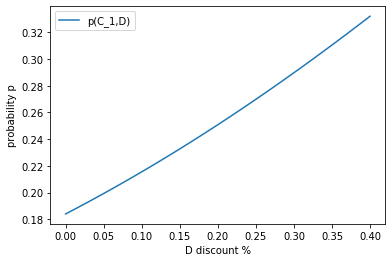

<function matplotlib.pyplot.close(fig=None)>

In [10]:
d_ = np.linspace(0,0.4,101)
y_1, p_1 , deals_1 = G.P_gen(np.array([list(C_1_oh)]*101),d_)
plt.plot(d_,p_1,label='p(C_1,D)')
plt.xlabel("D discount %")
plt.ylabel("probability p")
plt.legend()
plt.show()
plt.close

k(C_1), m(C_1) is the matrix-multiplication of C_1_oh*G.P.M+G.P.b, therefore we can modify G.P.M and/or G.P.b so k(C_1), m(C_1) have the desired values. Simplest way is to just modify an element in G.P.M where C_1_oh is not 0 e.g. index 2 (G.P.M[2,0], G.P.M[2,1]).

In [1]:
k_desired = 20
m_desired = 2.5

k_1,m_1 =np.matmul(C_1_oh,G.P.M)+G.P.b

k_diff = k_desired - k_1
m_diff = m_desired - m_1
G.P.M[2,0] = k_diff + G.P.M[2,0]
G.P.M[2,1] = m_diff + G.P.M[2,1]

k_1u,m_1u =np.matmul(C_1_oh,G.P.M)+G.P.b
print("new k(C_1): ", k_1u)
print("new m(C_1): ", m_1u)

NameError: name 'np' is not defined

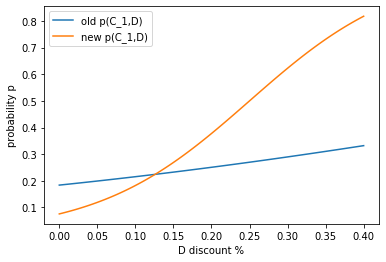

<function matplotlib.pyplot.close(fig=None)>

In [12]:
d_ = np.linspace(0,0.4,101)
y_1, p_1u , deals_1 = G.P_gen(np.array([list(C_1_oh)]*101),d_)
plt.plot(d_,p_1,label='old p(C_1,D)')
plt.plot(d_,p_1u,label='new p(C_1,D)')

plt.xlabel("D discount %")
plt.ylabel("probability p")
plt.legend()
plt.show()
plt.close

We can control the number of outcomes for a specific combination of C.  Combination of interest is C_1 = [2,1,0,3,6,3] and say we want m=20 copies of it and 5 copys of the rest. We call the C_gen again, but set complete_set=True, this means that it generates "copys" # of every C combination. 

In [13]:
C_data = G.C_gen(nr=50000, complete_set=True, copys=5)

nr = len(C_data)
print("len: ", nr)

len:  30720


Next we remove every element where C is C_1.

In [14]:
ind1 = np.where(np.array([list(C_) == list(C_1_oh) for C_ in C_data]))
C_data = np.delete(C_data,ind1[0],0)


Now we just add m=20 elements C_1 to the end of C_data.

In [15]:
m=20
C_data = np.concatenate((C_data,np.array([list(C_1_oh)]*m)),0)


Remember that you need the same number of C_data and D_data. 

In [16]:
nr = len(C_data)
D_data = G.D_gen(nr=nr)
y_data, p_data, deal_data =G.P_gen(C_data,D_data)
y_data, p_data, deal_data =G.P_gen(C_data,D_data)


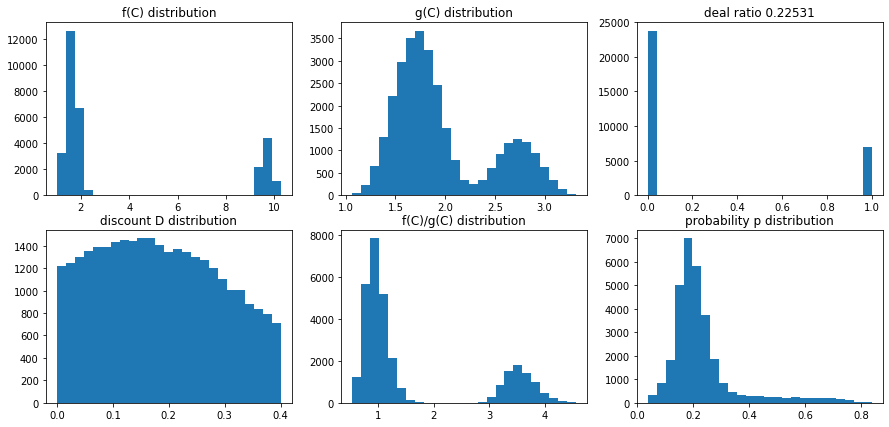

In [17]:
u, frac = np.unique(deal_data, return_counts=True)

# Ploting the distribution of the generated data
bins = 25
f, ax = plt.subplots(2,3,figsize=(15,7))
ax[0,0].hist(y_data[:,0],bins=bins)
ax[0,0].set_title("f(C) distribution")
ax[0,1].hist(y_data[:,1],bins=bins)
ax[0,1].set_title("g(C) distribution")
ax[1,0].hist(D_data,bins=bins)
ax[1,0].set_title("discount D distribution")
ax[1,1].hist(y_data[:, 0]/y_data[:, 1],bins=bins)
ax[1,1].set_title("f(C)/g(C) distribution")
ax[1,2].hist(p_data, bins=bins)
ax[1,2].set_title("probability p distribution")
ax[0, 2].hist(deal_data, bins=bins)
deal_ratio = np.round(frac[1]/(frac[0] + frac[1]),5)
ax[0, 2].set_title("deal ratio " + str(deal_ratio))
plt.show()
# plt.savefig('distributions_cpq_data')
plt.close()

#
p_stat = frac[1]/(frac[0] + frac[1])
